In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting (if using Jupyter)
%matplotlib inline


In [9]:
df = pd.read_csv(r"C:\Users\PALLAVI\OneDrive\Documents\netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
# Shape and column info
print(df.shape)
print(df.columns)

# Dataset summary
df.info()

# Null values
df.isnull().sum()


(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
# Drop rows with too many missing values
df = df.dropna(subset=['title', 'type', 'date_added'])

# Fill missing values in country/description with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')


In [19]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


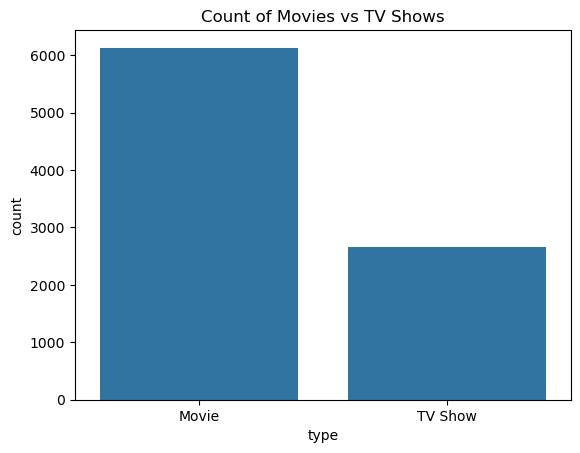

In [23]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.show()


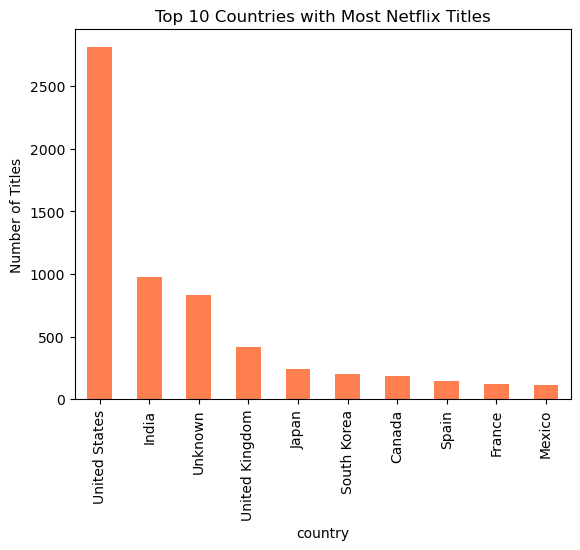

In [25]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='coral')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.ylabel("Number of Titles")
plt.show()


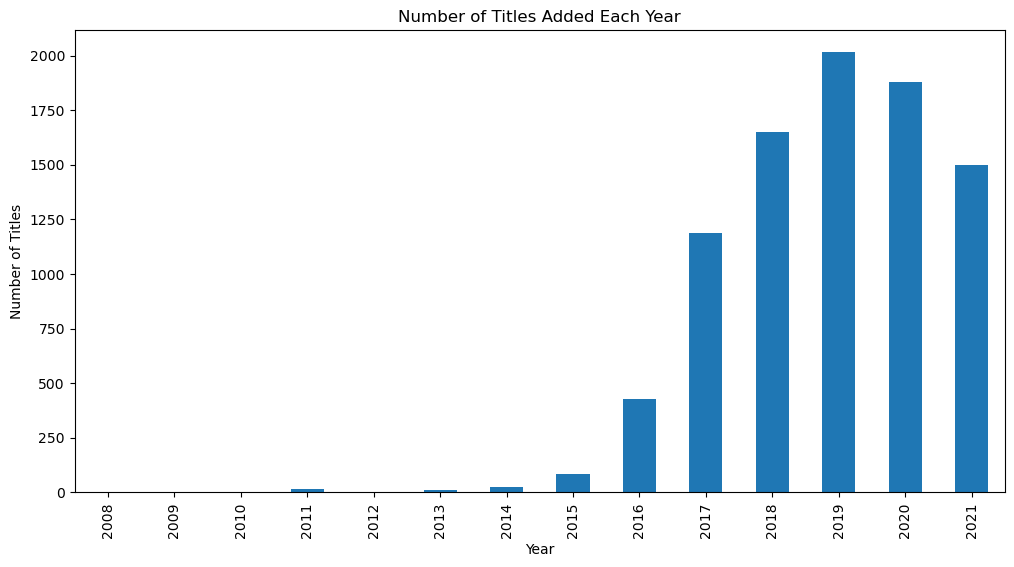

In [27]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Number of Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


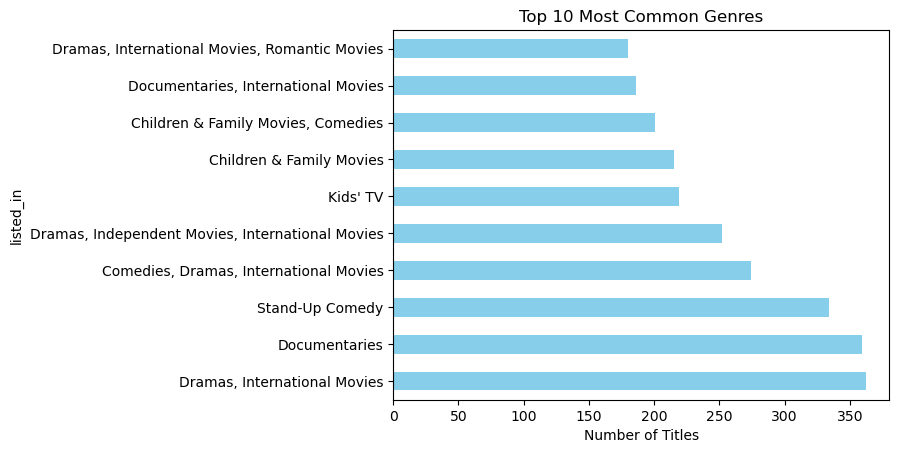

In [29]:
df['listed_in'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Titles")
plt.show()


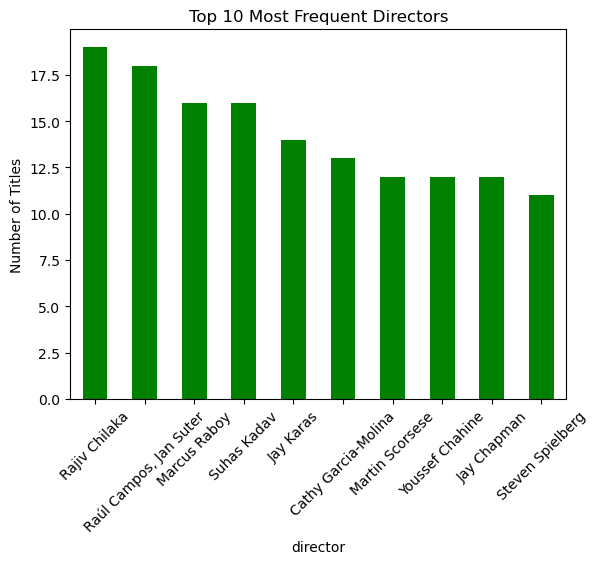

In [31]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='green')
plt.title("Top 10 Most Frequent Directors")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()
